In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#defining the true means
mu_true1 = np.array([0, 0, 0])
mu_true2 = np.array([1, 5, -3])
mu_true3 = np.array([0, 0, 0])

In [0]:
#defining the true covariance
cov_true1 = np.diag([3, 5, 2])
cov_true2 = np.array([[1, 0, 0], [0, 4, 1], [0, 1, 6]])
cov_true3 = 10*np.identity(3)

In [0]:
#generating train dataset points
TempMat = np.random.normal(size = (3, 20))
CholMat1 = np.linalg.cholesky(cov_true1)
data_train1 = np.transpose(np.dot(CholMat1, TempMat) + np.reshape(np.repeat(mu_true1, 20), (3, 20)))
CholMat2 = np.linalg.cholesky(cov_true2)
data_train2 = np.transpose(np.dot(CholMat2, TempMat) + np.reshape(np.repeat(mu_true2, 20), (3, 20)))
CholMat3 = np.linalg.cholesky(cov_true3)
data_train3 = np.transpose(np.dot(CholMat3, TempMat) + np.reshape(np.repeat(mu_true3, 20), (3, 20)))

In [0]:
temp = np.ones((20, 1))
data_train1 = np.concatenate((data_train1, temp), axis = 1)
temp = 2*temp
data_train2 = np.concatenate((data_train2, temp), axis = 1)
temp = 3*temp
data_train3 = np.concatenate((data_train3, temp), axis = 1)

In [0]:
data_train = np.concatenate((data_train1, data_train2, data_train3), axis = 0)

In [0]:
def mu_(data_):
  mu = np.sum(data_[:, 0:3], axis = 0) / (data_.shape[0]) #- 1)
  
  return(mu)

In [0]:
def cov_(data_, muI):
  cov = np.dot(np.transpose(data_[:, 0:3] - muI), (data_[:, 0:3] - muI)) / (data_.shape[0]) #- 1)

  return(cov)

In [0]:
def ShrinkageCov(cov_sub, cov, data_sub, data_, alpha_):
  cov_shrkn = ((1 - alpha_)*data_sub.shape[0]*cov_sub + alpha_*data_.shape[0]*cov) / ((1 - alpha_)*data_sub.shape[0] + alpha_*data_.shape[0])

  return(cov_shrkn)

In [0]:
def BiNormDis(X, muI, covI):
  #class conditional probabilities function
  detCovI = np.linalg.det(covI)
  X = X[0:3]
  fXI = np.exp(-0.5*np.dot(np.dot(np.transpose(X - muI), np.linalg.inv(covI)), (X - muI)))/np.sqrt(detCovI*(2*np.pi))

  return(fXI)

In [0]:
def BayesClassi(X, mu1, mu2, mu3, cov1, cov2, cov3):
  #class conditional probabilities
  fx1 = BiNormDis(X, muI = mu1, covI = cov1)
  fx2 = BiNormDis(X, muI = mu2, covI = cov2)
  fx3 = BiNormDis(X, muI = mu3, covI = cov3)
  #posterior probabilities
  q1 = p1*fx1 / (p1*fx1 + p2*fx2 + p3*fx3)
  q2 = p2*fx2 / (p1*fx1 + p2*fx2 + p3*fx3)
  q3 = p3*fx3 / (p1*fx1 + p2*fx2 + p3*fx3)

  #classification
  if (q2 < q1) and (q3 < q1):
    allot = 1
  elif (q1 <= q2) and (q3 < q2):
    allot = 2
  else:
    allot = 3
  
  return(allot)

In [0]:
def PredictorBC(X, mu1, mu2, mu3, cov1, cov2, cov3):
  pred = np.zeros(X.shape[0])
  #predicting the class
  for i in range(0, X.shape[0]):
    pred[i] += BayesClassi(X[i], mu1, mu2, mu3, cov1, cov2, cov3)
  
  correct = 0
  incorrect = 0
  #calculating accuracy
  for i in range(0, pred.shape[0]):
    if pred[i] == X[i, 3]:
      correct += 1
    else:
      incorrect += 1
  accuracy = correct / X.shape[0]
  
  return(pred, accuracy)

In [0]:
#estimating the mean of train dataset, classwise
mu_estm1 = mu_(data_train1)
mu_estm2 = mu_(data_train2)
mu_estm3 = mu_(data_train3)
print(mu_estm1, '\n')
print(mu_estm2, '\n')
print(mu_estm3)


[ 0.08859236 -0.15657396 -0.21507774] 

[ 1.05114882  4.85995599 -3.39969305] 

[ 0.16174678 -0.22142902 -0.48092844]


In [0]:
#estimataing the covariance of train dataset, classwise
cov_estm1 = cov_(data_train1, mu_estm1)
cov_estm2 = cov_(data_train2, mu_estm2)
cov_estm3 = cov_(data_train3, mu_estm3)
print(cov_estm1, '\n')
print(cov_estm2, '\n')
print(cov_estm3)

[[ 1.21567063 -0.28572511 -0.07845615]
 [-0.28572511  3.95465444  0.77043858]
 [-0.07845615  0.77043858  1.22809593]] 

[[ 0.40522354 -0.14754781 -0.11369121]
 [-0.14754781  3.16372355  1.95935885]
 [-0.11369121  1.95935885  4.3127225 ]] 

[[ 4.05223542 -0.73773907 -0.3202959 ]
 [-0.73773907  7.90930887  2.43634072]
 [-0.3202959   2.43634072  6.14047966]]


In [0]:
#common mean and covariance, data_train
mu_commn = mu_(data_train)
cov_commn = cov_(data_train, mu_commn)
print(cov_commn)

[[ 2.08247681  0.6478119  -0.80201169]
 [ 0.6478119  10.67481257 -1.69904762]
 [-0.80201169 -1.69904762  5.97505915]]


In [0]:
#prior probabilities
p1 = p2 = p3 = 1/3

In [0]:
alpha = np.arange(0, 1.1, 0.1)

In [0]:
TrainErr = np.zeros((alpha.shape[0], 1))
cov_shrnk1 = np.zeros((alpha.shape[0], 3, 3))
cov_shrnk2 = np.zeros((alpha.shape[0], 3, 3))
cov_shrnk3 = np.zeros((alpha.shape[0], 3, 3))

for i in range(0, alpha.shape[0]):
  cov_shrnk1[i] += ShrinkageCov(cov_estm1, cov_commn, data_train1, data_train, alpha[i])
  cov_shrnk2[i] += ShrinkageCov(cov_estm2, cov_commn, data_train2, data_train, alpha[i])
  cov_shrnk3[i] += ShrinkageCov(cov_estm3, cov_commn, data_train3, data_train, alpha[i])

  predI, accuI = PredictorBC(data_train, mu_estm1, mu_estm2, mu_estm3, cov_shrnk1[i], cov_shrnk2[i], cov_shrnk3[i])
  TrainErr[i] += (1-accuI)

36 24 60
37 23 60
38 22 60
38 22 60
38 22 60
37 23 60
36 24 60
36 24 60
35 25 60
32 28 60
32 28 60


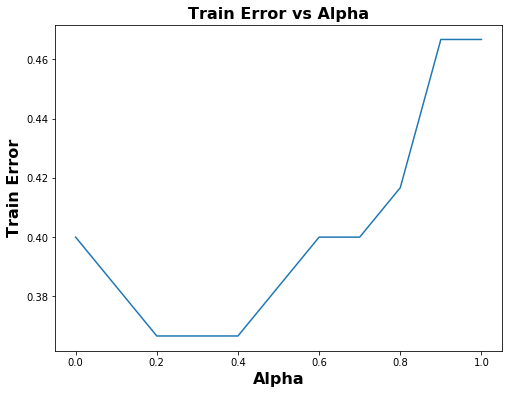

In [0]:
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(1, figsize=(8,6))
plt.plot(alpha,TrainErr)
plt.xlabel('Alpha', fontweight="bold", fontsize=16)
plt.ylabel('Train Error', fontweight="bold", fontsize=16)
plt.title('Train Error vs Alpha', fontweight="bold", fontsize=16)
plt.savefig('trainvsalpha.png')
files.download('trainvsalpha.png')

In [0]:
TempMatTest = np.random.normal(size = (3, 50))
CholMat1 = np.linalg.cholesky(cov_true1)
data_test1 = np.transpose(np.dot(CholMat1, TempMatTest) + np.reshape(np.repeat(mu_true1, 50), (3, 50)))
CholMat2 = np.linalg.cholesky(cov_true2)
data_test2 = np.transpose(np.dot(CholMat2, TempMatTest) + np.reshape(np.repeat(mu_true2, 50), (3, 50)))
CholMat3 = np.linalg.cholesky(cov_true3)
data_test3 = np.transpose(np.dot(CholMat3, TempMatTest) + np.reshape(np.repeat(mu_true3, 50), (3, 50)))

In [0]:
temptest = np.ones((50, 1))
data_test1 = np.concatenate((data_test1, temptest), axis = 1)
temptest = 2*temptest
data_test2 = np.concatenate((data_test2, temptest), axis = 1)
temptest = 3*temptest
data_test3 = np.concatenate((data_test3, temptest), axis = 1)

In [0]:
data_test = np.concatenate((data_test1, data_test2, data_test3), axis = 0)
data_test.shape

(150, 4)

In [0]:
TestErr = np.zeros((alpha.shape[0], 1))

for i in range(0, alpha.shape[0]):
  predI, accuI = PredictorBC(data_test, mu_estm1, mu_estm2, mu_estm3, cov_shrnk1[i], cov_shrnk2[i], cov_shrnk3[i])
  TestErr[i] += (1-accuI)

72 78 150
77 73 150
78 72 150
78 72 150
78 72 150
78 72 150
79 71 150
81 69 150
80 70 150
80 70 150
77 73 150


In [0]:
print(TestErr)

[[0.52      ]
 [0.48666667]
 [0.48      ]
 [0.48      ]
 [0.48      ]
 [0.48      ]
 [0.47333333]
 [0.46      ]
 [0.46666667]
 [0.46666667]
 [0.48666667]]


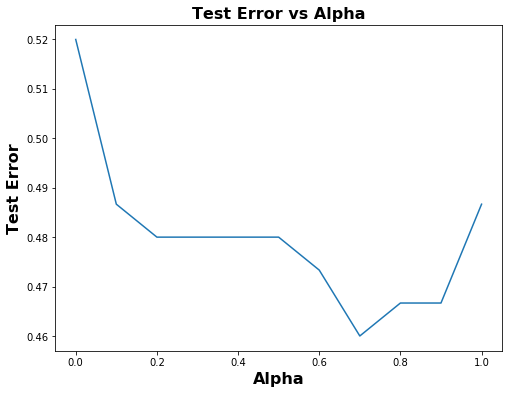

In [0]:
plt.figure(2, figsize=(8,6))
plt.plot(alpha,TestErr)
plt.xlabel('Alpha', fontweight="bold", fontsize=16)
plt.ylabel('Test Error', fontweight="bold", fontsize=16)
plt.title('Test Error vs Alpha', fontweight="bold", fontsize=16)
plt.savefig('testvsalpha.png')
files.download('testvsalpha.png')